In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [24]:
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [25]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


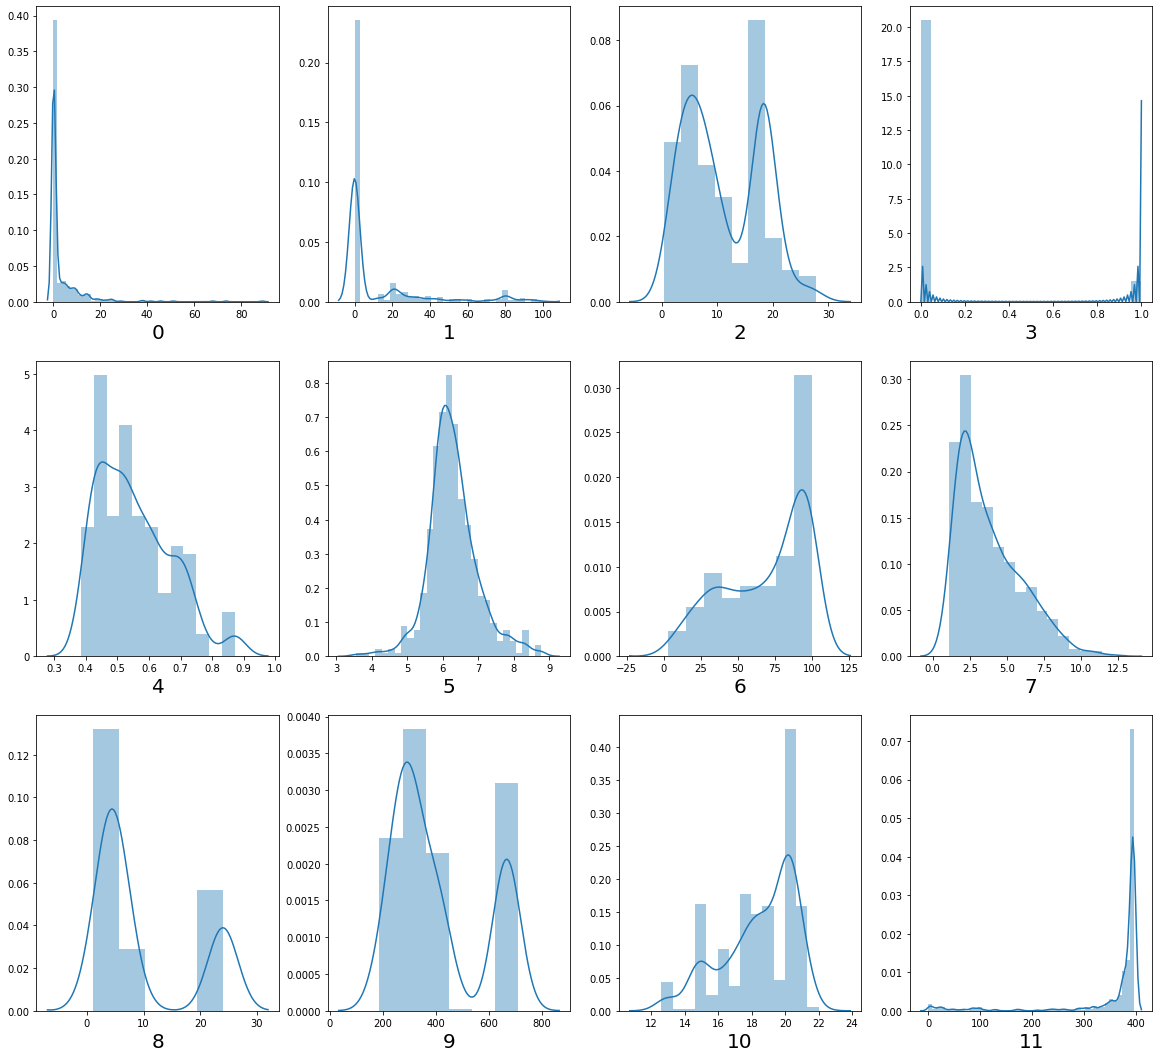

In [26]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=12 :     # as there are 9 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [38]:
bos.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [28]:
X = bos.iloc[:,:-1]
y =bos.iloc[:,-1]

In [29]:
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45


In [30]:
y

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: 12, Length: 506, dtype: float64

In [31]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [32]:
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -0.66660821,
        -1.45900038,  0.44105193],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.98732948,
        -0.30309415,  0.44105193],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.98732948,
        -0.30309415,  0.39642699],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583,  0.44105193],
       [-0.40776407, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583,  0.4032249 ],
       [-0.41500016, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583,  0.44105193]])

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 0)

In [34]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred =reg.predict(x_test)

In [46]:
y_pred

array([ 5.41749118, 17.30548348, 12.73298151, 22.8516182 , 10.22090422,
       12.84085889, 13.38103571, 11.80349185, 15.56996251, 16.66624727,
       31.97099821, 19.87094273, 16.99051082, 26.26610141,  7.56094207,
        2.47106981, 12.69764612,  2.94295554,  6.16192919, 10.62333249,
        9.19029358, 16.93819017, 14.08184253,  7.47513171, 10.27321689,
       31.11875411, 15.2084627 , 19.96980545,  3.08117306, 14.44785279,
       16.99391147, 16.06010438, 12.3687825 , 11.14714822, 11.15322147,
       17.72343752, 20.42355035, 17.72687942, 18.56223658, 17.41145928,
        7.05098676,  9.77269764,  7.58750231, 20.10458551,  7.85294491,
       10.99972279, 11.93389146, 16.65088005, 21.95090887, 10.84165262,
       18.49714823, 11.04526193, 12.21367338, -3.05384987, 20.25354669,
        9.82002973, 10.05645531, 10.91027129, 29.52257729, 14.46619468,
        8.40582942, 11.39610348,  3.28838772,  5.61398169, 15.61165119,
        6.08304021, 15.0579033 , 12.40370771, 17.3280829 ,  9.06